In [1]:
import numpy as np
import pandas as pd
from scipy.stats import laplace
import scipy.stats
import psycopg2
from sklearn.metrics import mean_squared_error


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime

from psql_functions import execQuery, execRangeQuery
from miss_data import add_missing_dates, add_missing_counts
from sample_range_query import load_range_queries_n_split

In [2]:
param_dic = {
    "host"      : "localhost",
    "database"  : "bachelorBesoeg2014",
    "user"      : "postgres",
    "password"  : "password",
    "port"      : "5432"
}

query = """select time_ from _775147;"""
result = execQuery(param_dic, query)
dates = [(date[0]) for date in result]

query = """select count_ from _775147;"""
result = execQuery(param_dic, query)

counts = [(count[0]) for count in result]

data_dates = add_missing_dates(dates)
data_counts =  add_missing_counts(counts, dates, data_dates)


Executed query and closed connection.
Executed query and closed connection.


In [3]:
print(f'There should be datapoints {(dates[-1]-dates[0]).days}')
print(f'There is {len(dates)} datapoints')
print(f'So we are missing {(dates[-1]-dates[0]).days - len(dates)} datapoints')
print(len(data_dates))

There should be datapoints 2005
There is 1794 datapoints
So we are missing 211 datapoints
2006


In [321]:
def plot_estimates_hh_degree(number_of_queries, N, model, epsilon, degree, dates, counts, range_qurey, plot_name):
    
    test_dates, test_counts = dates[:N].copy(), counts[:N].copy()
    answers = np.zeros(number_of_queries)
    

    for i in range(0,number_of_queries):
        current_model = model(epsilon, degree, test_dates, test_counts)
        answer = current_model.answer(range_qurey)
        answers[i] = answer
    print(answers)
    correct_answer = current_model.real_answer(range_qurey)
    
    x = np.arange(0,number_of_queries)
    answers.sort()

    plt.scatter(x,answers, marker = '+', label="Esitmates")
    plt.axhline(np.mean(answers),linewidth=0.5, color='r', linestyle = '-', label="Mean of esitmates ")
    plt.axhline(correct_answer,linewidth=.4, color='b', linestyle = '--', label="Correct answer")
    #plt.hlines(np.mean(answears128),line_range[0],line_range[1])
    #plt.hlines(np.mean(correct_answear),line_range[0],line_range[1])
    plt.legend()
    plt.title(f'Continuous Observations with N = {N}, B = {degree} and \u03B5 = {epsilon}')
    plt.savefig(plot_name)
    plt.show()
    return answers

3
[6086.34682919]
[5.12013652e+03 9.47789692e+02 4.05729946e-01]
[ 1.75135917e+03  1.41822265e+03  1.94349155e+03  9.44868458e+02
 -2.92123348e+00 -6.32712090e+00  1.95316911e+00  1.54743916e+00
 -4.57289530e+00]
[ 4.96380412e+02  6.73021237e+02  6.11076314e+02  3.33308775e+02
  5.97086122e+02  4.72077583e+02  9.41850471e+02  3.82358922e+02
  6.09845452e+02  6.46491955e+02  3.05623497e+02  3.79352035e+00
 -3.87257919e+00 -9.51345710e-01  5.10882259e+00 -5.75336643e+00
  5.73754474e-01 -5.42888733e-01 -4.06564078e-01 -2.35973319e+00
  1.14704484e+00  1.43765189e+00 -1.09787274e-01 -2.75541252e+00
 -4.08324783e+00  4.89647470e-01  2.13093636e-01]
[ 2.55702081e+02  1.24321670e+02  1.26808709e+02  1.67793185e+01
  2.91758081e+02  3.61511607e+02  2.88815604e+02  2.53739290e+02
  7.47089878e+01  7.87463453e+01  4.37569796e-01  2.55496617e+02
  3.56452103e+02  2.41365981e+02 -5.40872967e+00  3.87258363e+02
  7.91807795e+01  7.48833393e-02  3.08931448e+02  3.63080977e+02
  2.63456007e+02  2.48

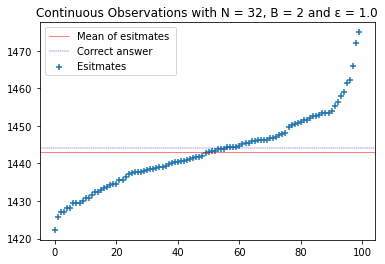

[1452.82761587 1417.96473127 1437.98484663 1440.8904598  1446.26716078
 1445.76333696 1442.39175262 1444.33147685 1425.7544885  1437.24630867
 1436.66196818 1451.45539707 1446.42521391 1446.39241258 1441.90924706
 1448.52780688 1443.71535867 1424.57277282 1437.62671148 1439.50812109
 1440.69158386 1446.04221542 1442.71816026 1446.16812015 1436.16523081
 1444.43523306 1454.36198404 1441.37907377 1445.82274028 1444.59249692
 1448.4364687  1440.26279701 1445.35836605 1450.77514623 1438.05593215
 1456.73699127 1445.2910656  1420.74605991 1442.32169987 1450.53812173
 1451.432216   1437.04841454 1449.43343454 1457.92277818 1439.41778772
 1440.83133673 1435.56011168 1441.06155909 1440.02551378 1429.21651013
 1444.62989095 1453.29630203 1438.45833111 1449.79347672 1445.75726194
 1429.83643205 1445.56949704 1436.81459982 1418.22314956 1463.4615545
 1455.68741454 1452.39718267 1439.32886849 1441.30975935 1426.42729545
 1441.23683511 1453.89739238 1450.5818984  1440.48487575 1451.4152846
 1423.95

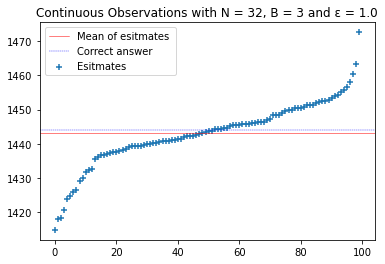

[1467.68118457 1441.42411081 1441.55045529 1450.41819586 1442.88959907
 1447.8076896  1453.02824742 1457.57179247 1443.90031084 1439.04110736
 1450.5540176  1452.9102544  1440.79219028 1428.04522611 1438.19478867
 1440.56849332 1442.89646867 1453.47180862 1442.77286371 1448.80094472
 1450.60596809 1441.91350159 1437.34352429 1446.68063231 1451.59533292
 1435.9739975  1444.78371775 1439.73039237 1444.59854883 1447.14329099
 1436.32802637 1457.2369341  1433.23320284 1443.49623588 1446.35244432
 1440.9961985  1437.08205559 1434.86743535 1446.2688133  1452.42977366
 1442.94157448 1448.87395326 1430.95669799 1435.3093039  1451.06098601
 1457.38314463 1447.64183726 1446.14558812 1453.41123371 1420.77518325
 1450.32371733 1435.67336594 1443.36550748 1434.56549262 1458.95030692
 1434.7681467  1448.40514353 1446.38239933 1447.31064185 1433.94376154
 1449.39202621 1450.62008208 1444.59451659 1452.56295038 1436.08803401
 1420.2939135  1445.97283681 1440.65970162 1429.53544359 1446.88254346
 1450.

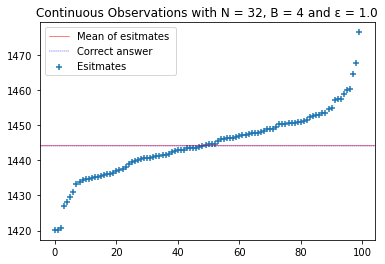

'\n\nfor level in c_o.tree_levels:\n    print(level)\n'

In [323]:
import numpy as np
import pandas as pd
from scipy.stats import laplace
from datetime import datetime

import numpy as np
import pandas as pd
from scipy.stats import laplace
from datetime import datetime

import numpy as np
import pandas as pd
from scipy.stats import laplace
from datetime import datetime

class con_obs:
    
    def __init__(self, epsilon, degree, dates, counts):
        """Setup of the datastructere

        Parameters:
        T (int): The lenght of the stream
        epsilon (float): The height of the full binary tree. 
        dates (Array): The dates of the stream
        counts (Array): The count for each of the dates
        Returns:
        A epsilon differintial datastructe
        """
        
        self.degree = degree
        
        self.all_dates = dates
        self.all_counts = counts
        #Check if we are we have missing dates.
        if len(dates) < (dates[-1]-dates[0]).days:  
            self.all_dates = self.__add_missing_dates(self.all_dates)
            self.all_counts = self.__add_missing_counts(self.all_counts,dates)
        
        self.all_dates = self.pad_dates(self.all_dates)
        self.all_counts = self.pad_counts(self.all_counts)
        
        #Make dict for date indexing
        values = np.arange(0,len(self.all_dates))
        zip_iterator = zip(self.all_dates, values)
        self.idx_dict =  dict(zip_iterator)
        
        # We need the stream to be a power of the degree
        self.T = int(np.ceil(np.log(len(self.all_counts)) / np.log(self.degree))+1)
        self.epsilon = epsilon
        self.zeta = (np.log2(self.T))/epsilon
            
        # The height of the "adic tree"
        self.n_layers = int(np.log(self.T)/np.log(self.degree))
        self.h = int(np.ceil(np.log(len(self.all_dates)) / np.log(degree)))

        # Get laplace for each node
        self.laplaces = self.init_laplace()
        self.histogram = self.build_histogram()
        self.tree_levels = self.__process(self.all_counts)
    
    def init_laplace(self):
        """
        returns: list of arrays with the correct size of laplaces variabels.
        """
        laplaces = []
        for i in np.arange(0,self.T):
            rvs = laplace(scale=self.zeta).rvs(int(self.degree**np.ceil(i)))
            laplaces.append(rvs)
        
        for i in np.arange(0,self.T-1):
            for j in np.arange(0,len(laplaces[i])):
                
                ch1, ch2 = self.get_children(j,i)
                laplaces[i+1][ch1] = laplaces[i+1][ch1] + laplaces[i][j]
                laplaces[i+1][ch1] = laplaces[i+1][ch2] + laplaces[i][j]
        
        return laplaces
    
    def build_histogram(self):
        #print(counts)
        #print(get_group(counts,degree))
        tree = []
        left = self.all_counts
        for level in np.arange(0,self.T):
            split_ratio = self.degree**level
            left = np.array_split(self.all_counts, split_ratio)

            sums = [np.sum(a) for a in left]
            tree.append(sums)
                     
        tree.append(self.all_counts)
        return tree   
        
    def __add_missing_dates(self, old_dates):
        """Add missing dates in a list
        Parameters:
        old_dates (list of datetime.date): List of dates that is not countious
        Returns:
        List of countious starting with the first value of 
        """
        start_date = old_dates[0]
        end_date = old_dates[-1]
        all_dates = pd.date_range(start = start_date, end = end_date).to_pydatetime().tolist()
        return [(date.date()) for date in all_dates]
    
    def __add_missing_counts(self, old_counts, old_dates):
        """Adds 0 to the list of counts where there was missing dates
        Parameters:
        old_counts (list of int): List counts for each day with 
        old_dates (list of datetime.date): List of dates that is not countious
        Returns:
        List of countious starting with the first value of 
        """
        zip_iterator = zip(old_dates, old_counts)
        missing_dict =  dict(zip_iterator)
        all_counts = np.zeros(len(self.all_dates))
        for i, date in enumerate(self.all_dates):
            val = missing_dict.get(date, 0)
            all_counts[i] = val
            
        return all_counts
    
    def pad_counts(self, counts):
        levels = int(np.ceil(np.log(len(counts)) / np.log(self.degree)))

        n_missing_counts =  self.degree**levels -len(counts)

        missing = np.zeros(n_missing_counts, dtype=int)
        new_counts = np.concatenate((counts,missing))
        return new_counts

    def pad_dates(self, dates):
        levels = int(np.ceil(np.log(len(dates)) / np.log(self.degree)))
        n_missing_dates =  self.degree**levels - len(dates)

        start_date = datetime.strptime(str(dates[-1]),'%Y-%m-%d').date()
        result = pd.date_range(start = start_date, periods = n_missing_dates).to_pydatetime().tolist()

        new_dates = np.concatenate((dates,result))
        return new_dates
    
    def __process(self, counts):
        """
        def __process(self, counts):
               
            noise_counts = np.zeros(len(self.dates))
            for idx, date_count in enumerate(counts):
                indices = self.get_index(idx,self.n_layers)
                indices.reverse()
                laplace_sum = 0.0
                for laplace_idx, laplace_row in enumerate(self.laplaces):
                    laplace_sum = laplace_sum + laplace_row[indices[laplace_idx]]
                noise_counts[idx] = date_count  +  noise_counts[idx-1] + laplace_sum
            return noise_counts
        
        """
        hh = []
        for i in range(0,len(self.laplaces)):

            level = self.laplaces[i] + self.histogram[i]
            hh.append(level)
        return hh  
    
    def get_index(self, date_idx, n_layers):
        """Calculates the path of index in full binary string

        Parameters:
        date_idx (int): The node in the bouttom layer we want to calculate a path to. 
        The bottom layer has index from 0 to 2**h-1
        n_layers (int): The height of the full binary tree. 

        Returns:
        list: of index in the path from the starting from the bottom and going up

        """
        idx = []
        for i in np.arange(0,self.h):
            if i == 0:
                idx.append(int(date_idx))
            else:
                idx.append(int(idx[i-1]//self.degree))
        idx.append(0)
        return idx
    
    def get_children(self, idx, level):
        """Calculates the path of index in full binary string

        Parameters:
        date_idx (int): The node in the bouttom layer we want to calculate a path to. 
        The bottom layer has index from 0 to 2**h-1
        n_layers (int): The height of the full binary tree. 0 index

        Returns:
        list: of index in the path from the starting from the bottom and going up

        """
        child_1 = idx*self.degree
        child_2 = idx*self.degree + 1

        return child_1, child_2
    
    def get_group(self, idx, level):
        """Calculates the path of index in full binary string

        Parameters:
        date_idx (int): The node in the bouttom layer we want to calculate a path to. 
        The bottom layer has index from 0 to 2**h-1
        n_layers (int): The height of the full binary tree. 0 index

        Returns:
        list: of index in the path from the starting from the bottom and going up

        """
        if level == 0:
            return id
        elif idx == 0:
            return np.arange(0,self.degree)
        else:
            group_index = idx //self.degree
            level_indicis = np.arange(0,self.degree**level)

            split_ratio = (len(level_indicis) // self.degree)
            level_indicis_split = np.array_split(level_indicis, split_ratio)
            
            return level_indicis_split[group_index]
    
    def turns_right(self, path):
        #0 is left 1 is right
        direction_lst = []
        for i in range(len(path)-1):
            #print(f'i = {i}')
            current = path[i]
            nxt = path[i+1]

            if nxt == 0:
                #We went left
                direction_lst.append(0)

            elif nxt == current*self.degree + self.degree - 1:
                #We went right
                direction_lst.append(1)

            else: 
                direction_lst.append(0)
            
        return direction_lst


    def turns_left(self, path):
        #0 is left 1 is right
        direction_lst = []
        for i in range(len(path)-1):
            #print(f'i = {i}')
            current = path[i]
            nxt = path[i+1]

            #Checks
            if nxt == 0:
                #We went left
                direction_lst.append(1)
            #Checks
            elif current == 0 and current < nxt:
                #We went right
                direction_lst.append(0)
            elif nxt == self.degree * current:
                #We went left
                direction_lst.append(1)
            else:
                #We went right
                direction_lst.append(0)
            
        return direction_lst
    
    def answer(self, dates):
        """Calculates the path of index in full binary string

        Parameters:
        dates (tuple of string): Two dates in the format string 2000-12-19. 

        Returns:
        float: The private range count
        """
            
        date_obj_0 = datetime.strptime(dates[0],'%Y-%m-%d').date()
        date_obj_1 = datetime.strptime(dates[1],'%Y-%m-%d').date()

        idx_0 = self.idx_dict[date_obj_0]
        idx_1 = self.idx_dict[date_obj_1]
        
        idx_left = idx_0-1
        idx_right = idx_1+1
        
        path_to_left = np.flip(np.array(self.get_index(idx_left,self.h+1)))
        path_to_right = np.flip(np.array(self.get_index(idx_right,self.h+1)))
        
        turns_left_lst = self.turns_left(path_to_right)
        turns_right_lst = self.turns_right(path_to_left)

        range_count = 0.0
         
        if idx_0 == 0 and idx_1 == np.max(np.fromiter(self.idx_dict.values(), dtype = int)):
            node = self.tree_levels[0]
            range_count = node
        
        elif idx_0 == 0:

            level_offset = 1

            for i in range(len(turns_left_lst)):

                if turns_left_lst[i] == 0:
                    group = self.get_group(path_to_right[i+level_offset], i+level_offset)
                    idx_sss = np.where(group == path_to_right[i+level_offset])[0][0]

                    count_nodes = self.tree_levels[i+level_offset][group[:idx_sss]]
                    
                    for node in count_nodes:
                        range_count = range_count + node

        elif idx_1 == np.max(np.fromiter(self.idx_dict.values(), dtype = int)):
            
            level_offset = 1
            
            for i in range(len(turns_right_lst)):
                if turns_right_lst[i] == 0:

                    group = self.get_group(path_to_left[i+level_offset], i+level_offset)
                    idx_sss = np.where(group == path_to_left[i+level_offset])[0][0]

                    count_nodes = self.tree_levels[i+level_offset][group[idx_sss+1:]]
                    for node in count_nodes:
                        range_count = range_count + node          
                    
        else:
            
            level_offset = 1
            left_count = []
            left_count_group = []

            level_offset = 1
            left_count = []
            left_count_group = []

            for i in range(len(turns_left_lst)):
                if turns_left_lst[i] == 0:
                    group = self.get_group(path_to_right[i+level_offset], i+level_offset)
                    idx_sss = np.where(group == path_to_right[i+level_offset])[0][0]

                    left_count_group.append(group[:idx_sss]) 

                    count_nodes = self.tree_levels[i+level_offset][group[:idx_sss]]
                    left_count.append(count_nodes)

                else:
                    left_count_group.append(np.array([]))
                    left_count.append(np.array([]))

            #The search right side
            right_count = []
            right_count_group = []

            for i in range(len(turns_right_lst)):
                if turns_right_lst[i] == 0:

                    group = self.get_group(path_to_left[i+level_offset], i+level_offset)
                    idx_sss = np.where(group == path_to_left[i+level_offset])[0][0]

                    right_count_group.append(group[idx_sss+1:]) 

                    count_nodes = self.tree_levels[i+level_offset][group[idx_sss+1:]]
                    right_count.append(count_nodes)

                else:
                    right_count_group.append(np.array([]))
                    right_count.append(np.array([]))
            
            for i in range(len(left_count_group)):
                if left_count_group[i].size != 0 and right_count_group[i].size != 0:
                    #Both not zero
                    group_left = self.get_group(left_count_group[i][0], i+ level_offset)
                    group_right = self.get_group(right_count_group[i][0], i+ level_offset)

                    if not (np.array_equal(group_left,group_right)):
                        for node in left_count_group[i]:       
                            range_count = range_count + self.tree_levels[i+level_offset][node]

                        for node in right_count_group[i]:                            
                            range_count = range_count + self.tree_levels[i+level_offset][node]

                    else:
                        count_nodes = np.intersect1d(left_count_group[i], right_count_group[i])
                        for node in count_nodes:                            
                            range_count = range_count + self.tree_levels[i+level_offset][node]

                if left_count_group[i].size != 0 and right_count_group[i].size == 0:
                    #Left not zero
                    for node in left_count_group[i]:
                        if path_to_left[i] != path_to_right[i]:                            
                            range_count = range_count + self.tree_levels[i+level_offset][node]

                if right_count_group[i].size != 0 and left_count_group[i].size == 0:
                    #Right not zero
                    for node in right_count_group[i]:
                        if path_to_left[i] != path_to_right[i]:
                            range_count = range_count + self.tree_levels[i+level_offset][node]
        return range_count 
        
    def real_answer(self, dates):
        if len(dates) < 2:
            date_obj_0 = datetime.strptime(dates[0],'%Y-%m-%d').date()
            return self.all_counts[self.idx_dict[date_obj_0]]
        else:
            date_obj_0 = datetime.strptime(dates[0],'%Y-%m-%d').date()
            date_obj_1 = datetime.strptime(dates[1],'%Y-%m-%d').date()
            sum_ = np.sum(self.all_counts[self.idx_dict[date_obj_0]: self.idx_dict[date_obj_1]+1])  
            return sum_        
        


        

#T = len(dates)
epsilon = 0.7
c_o = cen_hh(epsilon, 3, data_dates[:32], data_counts[:32])

print(c_o.degree)
for level in c_o.tree_levels:
    print(level)



"""
c_o.tree_levels = hhs = [np.arange(0,1),
       np.arange(0,2),
       np.arange(0,4),
       np.arange(0,8),
       np.arange(0,16),
       np.arange(0,32)]
"""
print(c_o.idx_dict)
query_dates = ('2014-01-27','2014-02-01')
print(c_o.answer(query_dates))
print(c_o.real_answer(query_dates))
epsilon = 1.
degree = 2
number_of_queries = 100 
N = 32
plot_estimates_hh_degree(number_of_queries, N, cen_hh, epsilon, degree, data_dates, data_counts, query_dates, '1234.png')

degree = 3
number_of_queries = 100 
N = 32
plot_estimates_hh_degree(number_of_queries, N, cen_hh, epsilon, degree, data_dates, data_counts, query_dates, '1234.png')
    

degree = 4
number_of_queries = 100 
N = 32
plot_estimates_hh_degree(number_of_queries, N, cen_hh, epsilon, degree, data_dates, data_counts, query_dates, '1234.png')
    


"""

for level in c_o.tree_levels:
    print(level)
"""
    
#print(execRangeQuery(param_dic,query_dates)[0][0])
#print(c_o.answer(('2014-01-02','2014-01-05')))
#print(c_o.real_answer(('2014-01-02','2014-01-05')))

In [ ]:
epsilons = np.array([2,1.4,1.2,1,0.8,0.7,0.5,0.4,0.3])

In [ ]:
error_dicts = {}

for e in epsilons:
    print(e)
    number_of_queries = 100
    range_dates = ('2014-01-08','2014-01-09')
    answears = np.zeros(number_of_queries)
    corret_answear = execRangeQuery(param_dic,range_dates)[0][0]
    for i in range(0,number_of_queries):
        c_o = con_obs(epsilon, dates, counts)
        answears[i] = c_o.answer(('2014-01-08','2014-01-09'))
    error = np.abs(corret_answear-answears)
    max_error = np.amax(error)
    min_error = np.amin(error)
    true_values = np.full(number_of_queries, corret_answear)
    vfunc = np.vectorize(relative_error)
    rel_erorrs = vfunc(answears, corret_answear)
    mse = mean_squared_error(true_values, answears)
    error_dicts[e] = {'mse': mse, 'max': max_error, 'min': min_error, 'rel': np.mean(rel_erorrs), 'abs': np.mean(error)}



In [ ]:
#Getting all error values from dict
n = len(error_dicts)
mse_errors = np.zeros(n)
min_errors = np.zeros(n)
max_errors = np.zeros(n)
rel_errors = np.zeros(n)
abs_errors = np.zeros(n)

for num, item in enumerate(error_dicts.items()):
    mse_errors[num] = item[1]['mse']
    min_errors[num] = item[1]['min']
    max_errors[num] = item[1]['max']
    rel_errors[num] = item[1]['rel']
    abs_errors[num] = item[1]['abs']

In [ ]:
error_stack = np.vstack((min_errors,mse_errors,max_errors,rel_errors,abs_errors)).flatten()
min_labels = np.full(min_errors.size, 'min errors')
mse_labels = np.full(mse_errors.size, 'mse errors')
max_labels = np.full(max_errors.size, 'max errors')
rel_labels = np.full(rel_errors.size, 'rel errors')
abs_labels = np.full(rel_errors.size, 'abs errors')


labels_stack = np.vstack((min_labels,mse_labels,max_labels,rel_labels,abs_labels)).flatten()
epsilons_stack = np.vstack((epsilons,epsilons,epsilons,epsilons,epsilons)).flatten()


In [ ]:
seaborn_df = pd.DataFrame({'epsilons':epsilons_stack, 'errors':error_stack,'labels':labels_stack})
seaborn_df.to_csv('con_obs_seaborn_plotting_data.csv',index=False)

In [ ]:
all_data = pd.DataFrame({'epsilons':epsilons, 'min_errors':min_errors,'max_errors':min_errors,'mse_errors':mse_errors,'rel_errors':rel_errors,'abs_errors':abs_errors})
all_data.to_csv('con_obs_plotting_data.csv',index=False)

In [ ]:
sns.set()

In [ ]:
sns_plot = sns.catplot(x="epsilons", y="errors", hue="labels", data=seaborn_df)
sns_plot.set(yscale="log")
sns_plot.savefig("con_AllErrors.png")


In [ ]:
sns_plot = sns.scatterplot(data=seaborn_df.loc[seaborn_df['labels'] == 'min errors'], x ='epsilons', y ='errors')
plt.legend(labels=['min errors'])
sns_plot.get_figure().savefig('con_min_error.png') 

In [ ]:
sns_plot = sns.scatterplot(data=seaborn_df.loc[seaborn_df['labels'] == 'max errors'], x ='epsilons', y ='errors')
plt.legend(labels=['max errors'])
sns_plot.get_figure().savefig('con_max_error.png') 

In [ ]:
sns_plot = sns.scatterplot(data=seaborn_df.loc[seaborn_df['labels'] == 'mse errors'], x ='epsilons', y ='errors')
plt.legend(labels=['mse errors'])
sns_plot.get_figure().savefig('con_mse_error.png') 

In [ ]:
sns_plot = sns.scatterplot(data=seaborn_df.loc[seaborn_df['labels'] == 'rel errors'], x ='epsilons', y ='errors')
plt.legend(labels=['rel errors'])
sns_plot.get_figure().savefig('con_rel_error.png') 